# Timeseriese forecasting methods
This notebook explores different methods of timeseries forecasting for a defined time series.

In [112]:
# Imports

import numpy as np 
from numpy import random as rnd
from matplotlib import pyplot as plt
import sys,os,datetime,warnings,itertools,math,platform

import torch
import torch.nn as nn
from torch.nn import functional as F

import pandas as pd

from numpy.fft import fft,fftfreq

In [89]:
# Data path depends on machine
datapath_windows = r'D:\\UserData\\z003mxpm\\gitdir\\GITREPO\\TF_Data\\Dropbox\\TF_data\\BusinessMacroHistory\\data1\\'
datapath_macbook = r'../../../../../../../../Dropbox/TF_data/BusinessMacroHistory/data1/'

# Select relevant datapath
if platform.system()=='Windows':
    datapath = datapath_windows
else:
    datapath = datapath_macbook

In [90]:
# Load Macro-Econ data
df = pd.read_csv(datapath+'data.csv').merge(
    pd.read_csv(datapath+'documentation.csv'),
    left_on='Variable',right_on='file_name',
    how='left'
).drop(columns=['file_name','chapter'])

## Timeseries forecasting based on Fourier analysis

<AxesSubplot:title={'center':'U.S. Index of American Business Activity 01/1855-12/1970'}, xlabel='Date'>

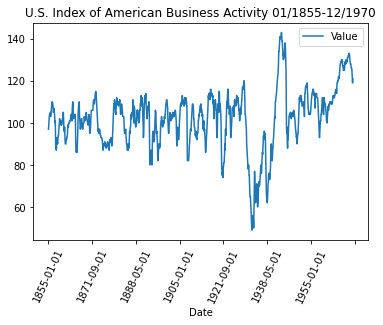

In [91]:
# Looking at variable m12003
# U.S. Index of American Business Activity 01/1855-12/1970

tf = df[df['Variable']=='m12003'].set_index('Date')[['Value']]
tf.plot(rot=65,title='U.S. Index of American Business Activity 01/1855-12/1970')

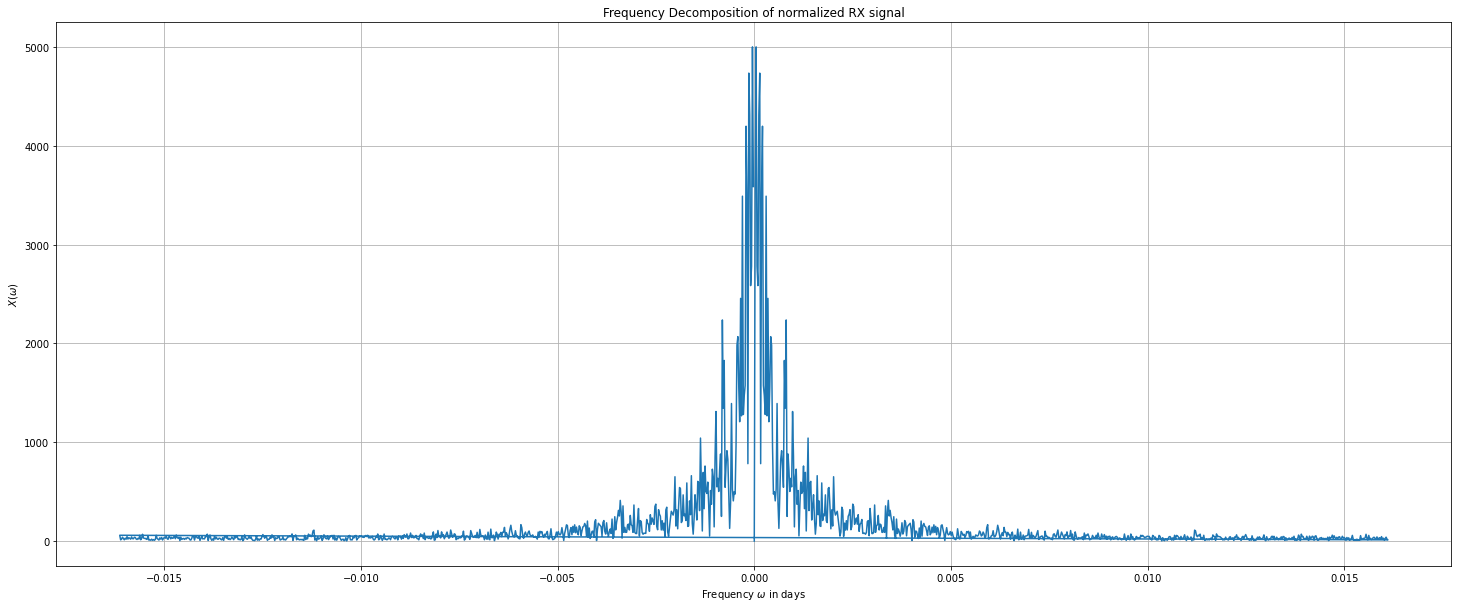

In [151]:
# Extract time axis and values
t = tf.index.values
x = tf['Value'].values

# Normalize values
x = x - x.mean()

# Create frequency axis 
sampling_timedelta_in_days = pd.to_datetime(tf.index[1]) - pd.to_datetime(tf.index[0])
freqs = fftfreq(len(t),sampling_timedelta_in_days.days)

# Frequency decomposition
X = fft(x)

# Plot result
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(25,10))

ax.plot(freqs,np.abs(X))
ax.set_xlabel('Frequency $\omega$ in days')
ax.set_ylabel('$X(\omega)$')
ax.set_title('Frequency Decomposition of normalized RX signal')
ax.grid()

plt.show()